<a href="https://colab.research.google.com/github/Araihan413/IlmuData-Semester6/blob/main/fork%20notebook/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install -U scikit-learn

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from sklearn import svm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [ ]:
# Find and download the dataset to your device using this link: https://osf.io/vnbxk/

# Change the raw sample path string passed in here and replace it with the absolute filepath of
# the GamingStudy_data.csv file on your device after downloading it.
df = pd.read_csv(r'C:\Users\SampleUser\Downloads\GamingStudy_data.csv', encoding='unicode_escape')

# After you change it, the statement might look something like this:

# df = pd.read_csv(r'C:\Shakraborty\Downloads\GamingStudy_data.csv', encoding='unicode_escape')

# Make sure to include the 'r' before the string to indicate a raw string value, otherwise the
# function will not accept it
df.head()

NameError: name 'pd' is not defined

In [ ]:

# Histograms for mental health scores
for col in ['GAD_T', 'SWL_T', 'SPIN_T']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
""" This cell will drop all columns that are not to be included in the training data of our models."""

df.drop(['highestleague', 'League', 'Zeitstempel', 'GADE',
         'Game', 'League', 'Narcissism', 'Reference', 'accept',
         'Residence', 'Birthplace', 'Unnamed: 0'], axis=1, inplace=True)

for i in range(7): # Drop general anxiety disorder scores
    df.drop([f"GAD{i + 1}"], axis=1, inplace=True)
for i in range(5): # Drop satisfaction with life scores
    df.drop([f"SWL{i + 1}"], axis=1, inplace=True)
for i in range(17): # Drop social phobia inventory
    df.drop([f"SPIN{i + 1}"], axis=1, inplace=True)


df.head(10)

,Platform,Hours,earnings,whyplay,streams,Gender,Age,Work,Degree,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Singleplayer,1,23,5.0,USA,USA
1,PC,8.0,I play for fun,having fun,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Multiplayer - online - with strangers,8,16,33.0,USA,USA
2,PC,0.0,I play for fun,having fun,0.0,Female,32,Employed,Bachelor (or equivalent),Singleplayer,8,17,31.0,DEU,DEU
3,PC,20.0,I play for fun,improving,5.0,Male,28,Employed,Bachelor (or equivalent),Multiplayer - online - with online acquaintanc...,0,17,11.0,USA,USA
4,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,1.0,Male,19,Employed,High school diploma (or equivalent),Multiplayer - online - with strangers,14,14,13.0,KOR,USA
5,"Console (PS, Xbox, ...)",4.0,I play for fun,relaxing,0.0,Male,24,Employed,Bachelor (or equivalent),Multiplayer - online - with real life friends,1,17,13.0,USA,USA
6,PC,30.0,I play for fun,relaxing,8.0,Male,29,Employed,High school diploma (or equivalent),Multiplayer - online - with online acquaintanc...,0,16,26.0,USA,USA
7,"Console (PS, Xbox, ...)",25.0,I play for fun,having fun,0.0,Female,23,Employed,Bachelor (or equivalent),Singleplayer,0,23,NaN,JPN,USA
8,"Console (PS, Xbox, ...)",2.0,I play for fun,winning,0.0,Female,23,Employed,Bachelor (or equivalent),Multiplayer - online - with strangers,12,12,55.0,USA,USA
9,PC,25.0,I play for fun,improving,0.0,Female,27,Employed,High school diploma (or equivalent),Multiplayer - online - with online acquaintanc...,10,13,26.0,FIN,FIN


In [ ]:
# Mark custom entries as Nan (not a number) before encoding

earnings_standard_answers = ['I earn a living by playing this game',
                             'I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)',
                             'I play for fun']
whyplay_standard_answers = ['winning', 'improving', 'relaxing', 'having fun']

Playstyle_standard_answers = ['Singleplayer', 'Multiplayer - offline (people in the same room)',
                              'Multiplayer - online - with strangers',
                              'Multiplayer - online - with online acquaintances or teammates',
                              'Multiplayer - online - with real life friends']


df['earnings'] = np.where(df['earnings'].isin(earnings_standard_answers), df['earnings'], np.nan)
df['whyplay'] = np.where(df['whyplay'].isin(earnings_standard_answers), df['whyplay'], np.nan)
df['Playstyle'] = np.where(df['Playstyle'].isin(earnings_standard_answers), df['Playstyle'], np.nan)

In [ ]:
# Encode categorical columns
nominal_columns = ['Platform', 'whyplay', 'Gender', 'Work', 'Playstyle', 'Residence_ISO3', 'Birthplace_ISO3', 'earnings']
ordinal_columns = ['Degree']
df = pd.get_dummies(df, columns=nominal_columns, prefix=nominal_columns)
label_encoder = LabelEncoder()
for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head(10)

,Hours,streams,Age,Degree,GAD_T,SWL_T,SPIN_T,"Platform_Console (PS, Xbox, ...)",Platform_PC,Platform_Smartphone / Tablet,...,Birthplace_ISO3_USA,Birthplace_ISO3_UZB,Birthplace_ISO3_VCT,Birthplace_ISO3_VEN,Birthplace_ISO3_VNM,Birthplace_ISO3_ZAF,Birthplace_ISO3_ZWE,earnings_I earn a living by playing this game,earnings_I play for fun,"earnings_I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)"
0,15.0,0.0,25,0,1,23,5.0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,8.0,2.0,41,0,8,16,33.0,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,0.0,0.0,32,0,8,17,31.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,20.0,5.0,28,0,0,17,11.0,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,20.0,1.0,19,1,14,14,13.0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
5,4.0,0.0,24,0,1,17,13.0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
6,30.0,8.0,29,1,0,16,26.0,False,True,False,...,True,False,False,False,False,False,False,False,True,False
7,25.0,0.0,23,0,0,23,NaN,True,False,False,...,True,False,False,False,False,False,False,False,True,False
8,2.0,0.0,23,0,12,12,55.0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
9,25.0,0.0,27,1,10,13,26.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False


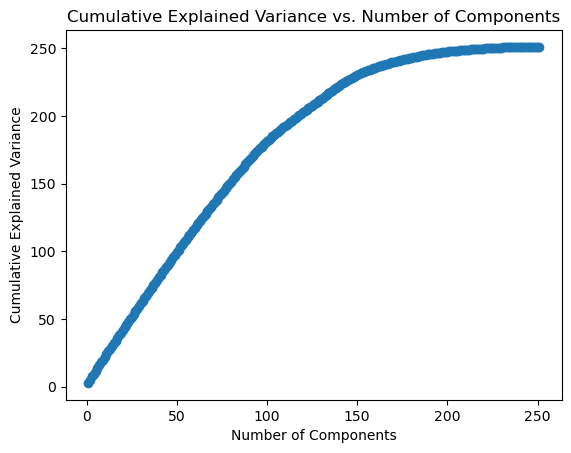

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,4.360542,0.626047,-0.723034,4.024161,0.794554,-1.535028,4.659880,3.781263,2.449919,-1.329719,...,-0.043692,-0.117150,-0.340958,-0.230793,0.052627,0.369678,0.313476,0.178983,0.065694,-0.008552
1,2.918236,-0.172544,-1.258344,0.678533,0.519517,0.846535,-1.258252,-0.123312,0.075196,-0.388256,...,-0.377320,0.069139,-0.860006,2.470079,0.005135,0.547797,0.539926,0.173768,0.068823,-0.558630
2,0.844280,1.927270,-2.134983,3.119445,-3.984433,2.552879,-0.896796,-0.602278,-0.237530,0.914547,...,-0.018880,-0.190750,0.178301,0.555151,-0.089411,0.052974,0.003284,-0.061268,0.000417,-0.226442
3,2.816891,-1.619394,-0.385643,0.698462,0.561888,0.735020,-0.810571,-0.131001,-0.149816,-0.050555,...,-0.059260,-0.219574,0.601182,-0.253114,-0.164722,-0.238638,-0.332375,-0.199594,0.002776,-0.021643
4,3.721269,1.407083,-1.207233,4.422785,0.496092,-1.761457,4.422348,3.848283,2.662220,-1.232625,...,-0.151860,-0.224747,0.479468,-0.312038,0.191986,0.603001,0.570742,0.445096,0.026515,0.012917
5,4.791175,0.287047,-0.849584,4.308286,0.676810,-1.548759,4.369471,3.651395,2.487549,-1.090518,...,0.021022,-0.369527,0.625650,-0.996548,-0.146753,-0.187903,-0.384599,-0.183208,0.007751,0.137883
6,2.760774,-1.087979,-0.183210,0.701120,0.508523,0.708663,-0.880328,-0.153926,-0.159353,-0.102437,...,-0.121904,-0.146980,0.278434,0.533033,-0.287105,-0.588247,-0.807618,-0.511083,-0.072164,-0.037482
7,6.143828,5.277511,-2.219438,4.322230,-1.325315,-1.953110,4.023083,2.731890,1.795795,-0.365952,...,0.242392,-0.131881,-0.189746,-0.931561,-0.146015,-0.324771,-0.516670,-0.302304,-0.066488,0.138220
8,0.881838,3.189579,-1.643544,2.213763,-0.571485,-0.960959,0.039476,-1.142402,-3.103307,-1.127439,...,-0.009031,-0.337164,0.907479,0.293481,-0.058782,-0.022953,-0.099591,-0.075102,-0.040515,-0.072120
9,3.377555,2.602114,-0.852260,-0.611146,-1.938467,-0.253998,-0.075212,-0.841742,-0.893573,0.767901,...,0.052722,-0.064083,0.313893,0.717121,0.604159,1.412897,1.756315,1.020683,0.106467,-0.105521


In [ ]:
"""Impute missing values and scale before applying PCA dimensionality reduction"""


# df is currently a NumPy array, turn it back into a DataFrame
df = pd.DataFrame(df)

# Drop rows with NaN values
df_clean = df.dropna()

# Get the discrete targets from the clean DataFrame
targets_discrete = df_clean[['GAD_T', 'SWL_T', 'SPIN_T']]

# Drop the target columns from the clean DataFrame
df_clean.drop(['GAD_T', 'SWL_T', 'SPIN_T'], axis=1)


scaler = StandardScaler()
# Scale the clean DataFrame then overwrite df
df = scaler.fit_transform(df_clean)

# Choose arbitrary # of components such as # equal to
# the amount of attributes currently in our data
pca = PCA(n_components=df_clean.shape[1])
PCA_reduced_df = pca.fit_transform(df)

cumulative_explained_variance = pca.explained_variance_.cumsum()

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

# That graph shows us that, at about 160 components, we stop
# seeing a significant increase in cumulative explained variance.
# Therefore, refit it again. I could have just initially put it
# as n_components=160 earlier, but I included this here for any
# code reviewers to see the process of why I selected 160
# components as my final choice - Jonathan Guzman

pca = PCA(n_components=160)
PCA_reduced_df = pca.fit_transform(df)
df = pd.DataFrame(PCA_reduced_df)
df.head(10)

In [ ]:
""" Now, it is time to split the data into training and validation sets,
    and also separate the classification data from the attribute data.
"""
# df is currently a NumPy array, turn it back into a DataFrame
df = pd.DataFrame(df)

features = df

training_features, validation_features, training_targets, validation_targets = (
    train_test_split(features, targets_discrete, test_size=0.2, random_state=42)
)


In [ ]:
""" Fit three random forest models with the training data and store them in a dictionary. """

target_names = ['GAD_T', 'SWL_T', 'SPIN_T']
RF_models = {}
for target in target_names:
    print(f"Fitting model to target {target}...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(training_features, training_targets[target])
    RF_models[target] = rf_model
print("Done.")

Fitting model to target GAD_T...
Fitting model to target SWL_T...
Fitting model to target SPIN_T...
Done.


In [ ]:
""" Fit three SVM models with the training data and store them in a dictionary. """
target_names = ['GAD_T', 'SWL_T', 'SPIN_T']
SVM_models = {}
for target in target_names:
    print(f"Fitting model to target {target}...")
    svm_poly = svm.SVC(kernel="poly", degree=2)
    pipeline_poly = make_pipeline(StandardScaler(), OneVsRestClassifier(svm_poly))
    pipeline_poly.fit(training_features, training_targets[target])
    SVM_models[target] = pipeline_poly
print("Done.")

Fitting model to target GAD_T...
Fitting model to target SWL_T...
Fitting model to target SPIN_T...
Done.


In [ ]:
""" Evaluate the random forest model performances """

for target, model in RF_models.items():
    y_pred = model.predict(validation_features)
    accuracy = accuracy_score(validation_targets[target], y_pred)
    precision = precision_score(validation_targets[target], y_pred, average='macro', zero_division=1)
    recall = recall_score(validation_targets[target], y_pred, average='macro', zero_division=1)
    f1 = f1_score(validation_targets[target], y_pred, average='macro', zero_division=1)

    print(f"Accuracy for {target}: {accuracy}")
    print(f"Precision for {target}: {precision}")
    print(f"Recall for {target}: {recall}")
    print(f"F1 for {target}: {f1}\n")

Accuracy for GAD_T: 0.3612750885478158
Precision for GAD_T: 0.3075148192024868
Recall for GAD_T: 0.27595221091121575
F1 for GAD_T: 0.32789753963380763

Accuracy for SWL_T: 0.20031483667847305
Precision for SWL_T: 0.2222708653106367
Recall for SWL_T: 0.188802489639129
F1 for SWL_T: 0.19564263048279676

Accuracy for SPIN_T: 0.1046831955922865
Precision for SPIN_T: 0.1479327750813693
Recall for SPIN_T: 0.0705318159602648
F1 for SPIN_T: 0.36557756722891205



In [ ]:
""" Evaluate the SVM model performances """

for target, model in SVM_models.items():
    y_pred = model.predict(validation_features)
    accuracy = accuracy_score(validation_targets[target], y_pred)
    precision = precision_score(validation_targets[target], y_pred, average='macro', zero_division=1)
    recall = recall_score(validation_targets[target], y_pred, average='macro', zero_division=1)
    f1 = f1_score(validation_targets[target], y_pred, average='macro', zero_division=1)

    print(f"Accuracy for {target}: {accuracy}")
    print(f"Precision for {target}: {precision}")
    print(f"Recall for {target}: {recall}")
    print(f"F1 for {target}: {f1}\n")

Accuracy for GAD_T: 0.2565918929555293
Precision for GAD_T: 0.1620834998092621
Recall for GAD_T: 0.17780502309377394
F1 for GAD_T: 0.29960830139527433

Accuracy for SWL_T: 0.12554112554112554
Precision for SWL_T: 0.12931680074371116
Recall for SWL_T: 0.13672470431431458
F1 for SWL_T: 0.12441369343004964

Accuracy for SPIN_T: 0.0747737111373475
Precision for SPIN_T: 0.06712749862811793
Recall for SPIN_T: 0.07084138436157504
F1 for SPIN_T: 0.39842139884538985



In [ ]:
""" Evaluate models based on average distance and flat number of classes from true class """

validation_features.reset_index(drop=True, inplace=True)
validation_targets.reset_index(drop=True, inplace=True)

print("NOW EVALUATING RF MODELS")
rf_average_dist = 0
for target, model in RF_models.items():
    average_dist = 0
    two_point_score = 0
    three_point_score = 0
    five_point_score = 0
    way_off = 0
    iterations = 0
    print(f"Evaluating RF model trained on target {target}...")
    for index, sample in validation_features.iterrows():
        sample_object = sample.values.reshape(1, -1)
        #print(sample_object.shape)
        #print(f"Sample object: {sample_object}")
        y_pred = model.predict(sample_object)
        #print(f"Accessing row {index} at column {target}")
        true_class = (validation_targets[target])[index]
        dist = abs(true_class - y_pred)
        average_dist += dist
        if dist <= 2:
            two_point_score += 1
        if dist <= 3:
            three_point_score += 1
        if dist <= 5:
            five_point_score += 1
        else:
            way_off += 1
        iterations += 1
        if iterations == int(len(validation_features) / 2):
            print("50% done")
        elif iterations == int(len(validation_features) * 0.85):
            print("85% done")
    average_dist = average_dist / len(validation_features)
    rf_average_dist += average_dist
    two_point_score = (two_point_score / len(validation_features)) * 100
    three_point_score = (three_point_score / len(validation_features)) * 100
    five_point_score = (five_point_score / len(validation_features)) * 100
    print(f"RF Prediction's average dist from {target}: {average_dist} -- Random guesser would be: {validation_targets[target].max() / 2}")
    print(f"    - % of RF predictions landing within 2 classes of the true class: {two_point_score:.2f}% ")
    print(f"    - % of RF predictions landing within 3 classes of the true class: {three_point_score:.2f}% ")
    print(f"    - % of RF predictions landing within 5 classes of the true class: {five_point_score:.2f}% ")
    print(f"    - Number of samples out of {len(validation_features)} that were more than two classes away from being predicted correctly: {way_off}")
    print("-------------------------------\n\n")
rf_average_dist = rf_average_dist / len(RF_models)
print(f"RF Model average dist from all targets: {rf_average_dist}\n\n")

print("NOW EVALUATING SVM MODELS")
svm_average_dist = 0
for target, model in SVM_models.items():
    average_dist = 0
    two_point_score = 0
    three_point_score = 0
    five_point_score = 0
    way_off = 0
    iterations = 0
    print(f"Evaluating SVM model trained on target {target}...")
    for index, sample in validation_features.iterrows():
        sample_object = sample.values.reshape(1, -1)#validation_features.iloc[sample].values.reshape(1, -1)
        y_pred = model.predict(sample_object)
        true_class = (validation_targets[target])[index]
        dist = abs(true_class - y_pred)
        average_dist += dist
        if dist <= 2:
            two_point_score += 1
        if dist <= 3:
            three_point_score += 1
        if dist <= 5:
            five_point_score += 1
        else:
            way_off += 1
        iterations += 1
        if iterations == int(len(validation_features) / 2):
            print("50% done")
        elif iterations == int(len(validation_features) * 0.85):
            print("85% done")
    average_dist = average_dist / len(validation_features)
    svm_average_dist += average_dist
    two_point_score = (two_point_score / len(validation_features)) * 100
    three_point_score = (three_point_score / len(validation_features)) * 100
    five_point_score = (five_point_score / len(validation_features)) * 100
    print(f"SVM Prediction's average dist from {target}: {average_dist} -- Random guesser would be: {validation_targets[target].max() / 2}")
    print(f"    - % of SVM predictions landing within 2 classes of the true class: {two_point_score:.2f}% ")
    print(f"    - % of SVM predictions landing within 3 classes of the true class: {three_point_score:.2f}% ")
    print(f"    - % of SVM predictions landing within 5 classes of the true class: {five_point_score:.2f}% ")
    print(f"    - Number of samples out of {len(validation_features)} that were more than two classes away from being predicted correctly: {way_off}")
    print("-------------------------------\n\n")
svm_average_dist = svm_average_dist / len(SVM_models)
print(f"SVM Model average dist from all targets: {svm_average_dist}\n\n")

NOW EVALUATING RF MODELS
Evaluating RF model trained on target GAD_T...
50% done
85% done
RF Prediction's average dist from GAD_T: [1.23101141] -- Random guesser would be: 10.5
    - % of RF predictions landing within 2 classes of the true class: 86.54% 
    - % of RF predictions landing within 3 classes of the true class: 92.52% 
    - % of RF predictions landing within 5 classes of the true class: 97.40% 
    - Number of samples out of 2541 that were more than two classes away from being predicted correctly: 66
-------------------------------


Evaluating RF model trained on target SWL_T...
50% done
85% done
RF Prediction's average dist from SWL_T: [2.08658009] -- Random guesser would be: 17.5
    - % of RF predictions landing within 2 classes of the true class: 68.48% 
    - % of RF predictions landing within 3 classes of the true class: 81.58% 
    - % of RF predictions landing within 5 classes of the true class: 93.43% 
    - Number of samples out of 2541 that were more than two c